In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqldf

# Đọc file csv
df = pd.read_csv('transaction_data.csv')
df['txn_time'] = pd.to_datetime(df['txn_time'])
df['txn_date'] = pd.to_datetime(df['txn_date'])
df['order_id'] = df['order_id'].astype('str')
df['uid'] = df['uid'].astype('str')
df['shop_id'] = df['shop_id'].astype('str')
df['shop_owner_uid'] = df['shop_owner_uid'].astype('str')

df.head()

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,2019-10-30 13:37:00,2019-10-30,142008725,102161515,1005,100054430,70000,20000
1,2019-10-30 20:26:00,2019-10-30,142119377,102867263,10050,1792841,80000,20000
2,2019-10-30 12:22:00,2019-10-30,141986418,100401383,10075,100155720,125000,20000
3,2019-10-30 09:46:00,2019-10-30,141941958,103213155,10088,103894677,82000,20000
4,2019-10-30 21:56:00,2019-10-30,142139275,101003290,10142,103909421,260000,20000


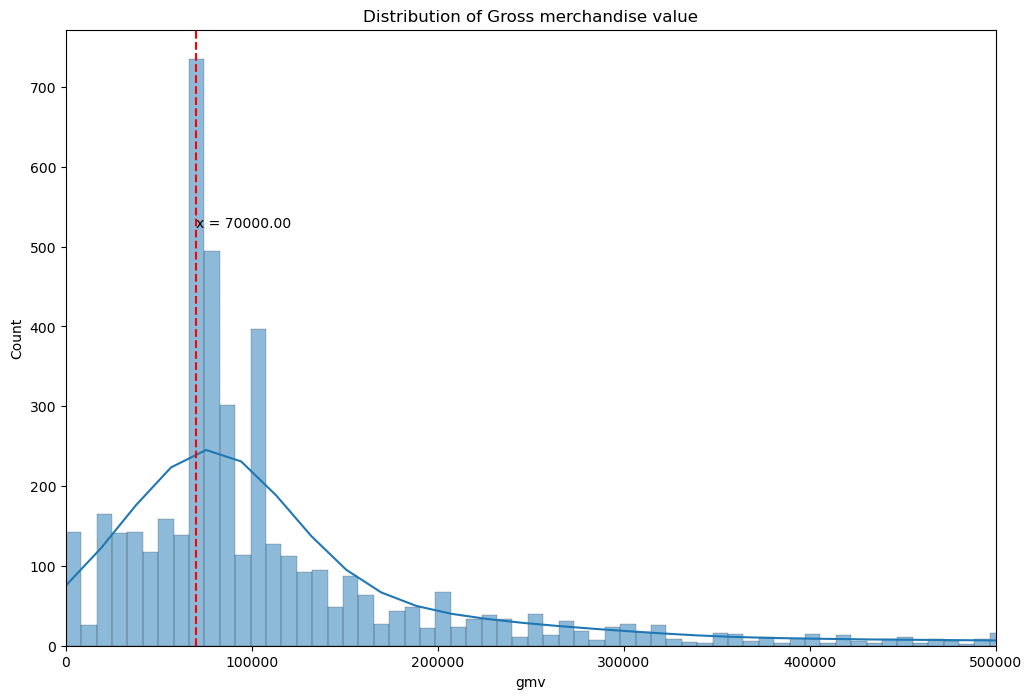

In [6]:

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12,8))

ax = sns.histplot(data=df, x=df.gmv, kde=True)
plt.xlim(0, 500000)

# Thêm tiêu đề
ax.set_title('Distribution of Gross merchandise value')

# Tìm giá trị x có số lượng đơn hàng lớn nhất
max_value = df.gmv.value_counts().sort_values(ascending=False).index[0]

# Vẽ đường line thẳng đứng
ax.axvline(x=max_value, color='r', linestyle='dashed', label='Maximum Order Quantity')

# Hiển thị giá trị x tại vị trí đường line
ax.annotate(f'x = {max_value:.2f}', (max_value, df.gmv.value_counts().sort_values(ascending=False).max()))

plt.show()


In [26]:
query = """
SELECT uid, count(gmv) as num
FROM df
GROUP BY uid
ORDER BY num DESC
"""

# Run the query
df_view = sqldf.run(query)
df_view.head()

,uid,num
0,100205391,26
1,100605978,23
2,1026737,16
3,103868446,10
4,103682325,10
